In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('DATA/cancer_classification.csv')

In [5]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

<AxesSubplot:xlabel='benign_0__mal_1', ylabel='count'>

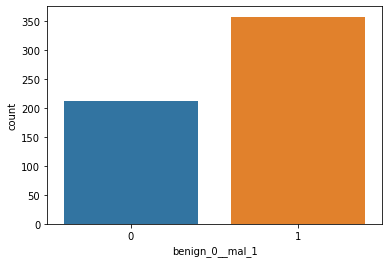

In [9]:
sns.countplot(x='benign_0__mal_1', data=df)

In [10]:
# More malignant than benign

<AxesSubplot:>

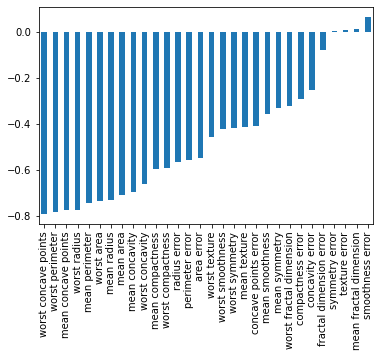

In [13]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

<AxesSubplot:>

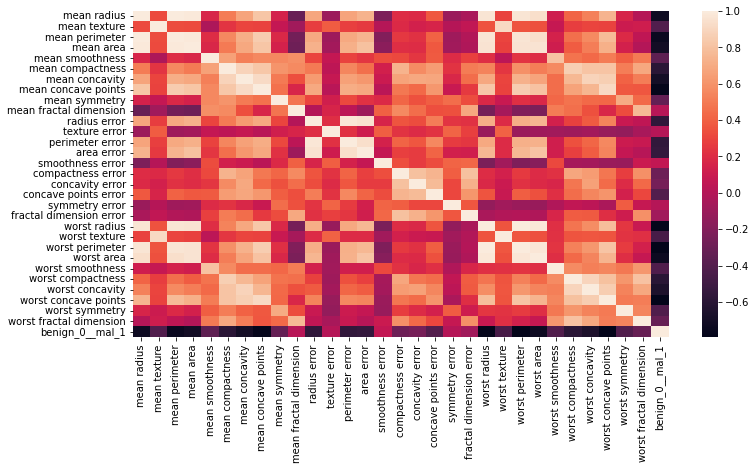

In [15]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr())

In [17]:
X = df.drop('benign_0__mal_1', axis=1).values
y = df['benign_0__mal_1'].values

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [20]:
from sklearn.preprocessing import MinMaxScaler

In [21]:
scaler = MinMaxScaler()

In [22]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [24]:
X_train.shape

(426, 30)

In [25]:
model = Sequential()

model.add(Dense(30, activation='relu'))

model.add(Dense(15, activation='relu'))

# BINARY CLASSIFICATION
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [26]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test))

Epoch 1/600
14/14 [==============================] - 0s 9ms/step - loss: 0.6757 - val_loss: 0.6556
Epoch 2/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6482 - val_loss: 0.6266
Epoch 3/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6193 - val_loss: 0.5919
Epoch 4/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5834 - val_loss: 0.5435
Epoch 5/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5393 - val_loss: 0.4879
Epoch 6/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4779 - val_loss: 0.4237
Epoch 7/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4186 - val_loss: 0.3678
Epoch 8/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3678 - val_loss: 0.3194
Epoch 9/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3233 - val_loss: 0.2807
Epoch 10/600
14/14 [==============================] - 0s 2ms/step - loss: 0.2894 - val_loss: 0.2557
Epoch 11/

In [27]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

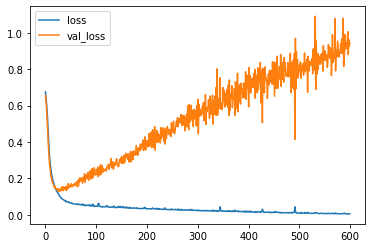

In [28]:
losses.plot()

In [30]:
# Obvious OVERFITTING

In [29]:
model = Sequential()

model.add(Dense(30, activation='relu'))

model.add(Dense(15, activation='relu'))

# BINARY CLASSIFICATION
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [31]:
from tensorflow.keras.callbacks import EarlyStopping

In [33]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [34]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 0s 7ms/step - loss: 0.6403 - val_loss: 0.6157
Epoch 2/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6056 - val_loss: 0.5822
Epoch 3/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5705 - val_loss: 0.5431
Epoch 4/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5293 - val_loss: 0.4967
Epoch 5/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4849 - val_loss: 0.4475
Epoch 6/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4358 - val_loss: 0.4032
Epoch 7/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3920 - val_loss: 0.3601
Epoch 8/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3520 - val_loss: 0.3304
Epoch 9/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3190 - val_loss: 0.2950
Epoch 10/600
14/14 [==============================] - 0s 2ms/step - loss: 0.2925 - val_loss: 0.2782
Epoch 11/

In [35]:
model_loss = pd.DataFrame(model.history.history)

<AxesSubplot:>

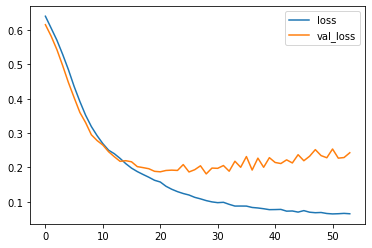

In [36]:
model_loss.plot()

In [37]:
# Using Dropouts

model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(15, activation='relu'))
model.add(Dropout(0.5))

# BINARY CLASSIFICATION
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [38]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 0s 7ms/step - loss: 0.7020 - val_loss: 0.6857
Epoch 2/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6826 - val_loss: 0.6745
Epoch 3/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6820 - val_loss: 0.6642
Epoch 4/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6701 - val_loss: 0.6527
Epoch 5/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6494 - val_loss: 0.6285
Epoch 6/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6452 - val_loss: 0.5921
Epoch 7/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6308 - val_loss: 0.5533
Epoch 8/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5900 - val_loss: 0.5211
Epoch 9/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5603 - val_loss: 0.5046
Epoch 10/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5509 - val_loss: 0.4617
Epoch 11/

In [39]:
model_loss = pd.DataFrame(model.history.history)

<AxesSubplot:>

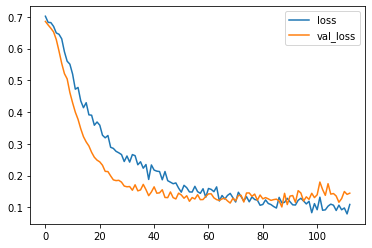

In [40]:
model_loss.plot()

In [45]:
predictions = (model.predict(X_test)>0.5)*1

In [46]:
from sklearn.metrics import classification_report, confusion_matrix

In [47]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95        55
           1       0.99      0.94      0.97        88

    accuracy                           0.96       143
   macro avg       0.95      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143



In [48]:
print(confusion_matrix(y_test, predictions))

[[54  1]
 [ 5 83]]


In [49]:
single = df.drop('benign_0__mal_1', axis=1).iloc[0]

In [53]:
single.values.reshape(-1,30)

array([[1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
        3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
        8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
        3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
        1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01]])

In [54]:
single = scaler.transform(single.values.reshape(-1,30))

In [55]:
model.predict(single)

array([[4.0057138e-08]], dtype=float32)

In [56]:
df.head(1)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189,0
